In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





# Binding affinity is the strength of the interaction between a molecule (ligand) and its target, like a protein. It is a measure of how strongly two molecules bind together  

# Molecular docking is a computational technique that predicts how a small molecule (ligand) fits into a protein’s active site. It estimates the binding orientation and strength of interaction, helping identify potential drug candidates.

#  What is the purpose of molecular docking?
# A: The main purpose is to predict the binding affinity and stability between a protein and a ligand. It helps in drug discovery by identifying molecules that could effectively modulate a target protein.

# What is virtual screening?
# A: Virtual screening is a computational approach to evaluate a large library of compounds against a target protein to identify promising candidates for further experimental testing. It’s like “filtering” potential drugs quickly and cost-effectively.

In [ ]:

np.random.seed(42)

# p.random.seed(42)

# This fixes the randomness — meaning every time you run the code, you’ll get the same random numbers.



# --- Molecular Docking Simulation ---
ligands = [f"Ligand_{i}" for i in range(1, 21)]
docking_scores = np.round(np.random.uniform(-12, -4, size=20), 2)
docking_df = pd.DataFrame({
    "Ligand": ligands,
    "Docking_Score (kcal/mol)": docking_scores
})



# Explanation:

# Creates 20 ligand names: Ligand_1 to Ligand_20.

# Generates 20 random docking scores between -12 and -4 kcal/mol (negative values = stronger binding).


# More negative = stronger binding → the ligand fits better and is more stable in the protein’s active site.

# Example:
# Docking scores are usually in kcal/mol, which is a measure of binding free energy.


# Negative value → the binding reaction releases energy → ligand binds spontaneously.

# More negative = stronger binding → the ligand fits better and is more stable in the protein’s active site.
# Ligand A: -11.5 kcal/mol

# Ligand B: -6.2 kcal/mol
# → Ligand A binds tighter than Ligand B.

# Positive or less negative values mean weak or unfavorable binding.

# np.round(..., 2) rounds scores to 2 decimal places.

# Stores everything in a DataFrame for easy handling and visualization.

In [3]:

print("=== Docking Results ===")
print(docking_df)

=== Docking Results ===
       Ligand  Docking_Score (kcal/mol)
0    Ligand_1                     -9.00
1    Ligand_2                     -4.39
2    Ligand_3                     -6.14
3    Ligand_4                     -7.21
4    Ligand_5                    -10.75
5    Ligand_6                    -10.75
6    Ligand_7                    -11.54
7    Ligand_8                     -5.07
8    Ligand_9                     -7.19
9   Ligand_10                     -6.34
10  Ligand_11                    -11.84
11  Ligand_12                     -4.24
12  Ligand_13                     -5.34
13  Ligand_14                    -10.30
14  Ligand_15                    -10.55
15  Ligand_16                    -10.53
16  Ligand_17                     -9.57
17  Ligand_18                     -7.80
18  Ligand_19                     -8.54
19  Ligand_20                     -9.67


C:\Users\Aarya Admane30\AppData\Local\Temp\ipykernel_17872\2119015741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ligand", y="Docking_Score (kcal/mol)", data=docking_df, palette="viridis")


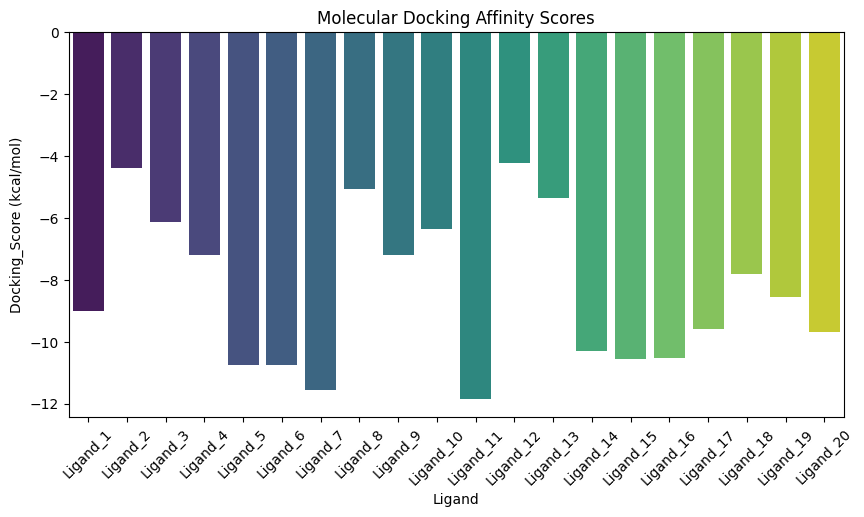

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(x="Ligand", y="Docking_Score (kcal/mol)", data=docking_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Molecular Docking Affinity Scores")
plt.show()



# Creates a bar plot of ligands vs docking scores.

# Rotates x-axis labels for readability.

# Uses “viridis” color palette.

# Helps you quickly see which ligand has the strongest binding (most negative score).

In [5]:
 # Select best ligand (lowest score = best binding)
 best_ligand = docking_df.loc[docking_df["Docking_Score (kcal/mol)"].idxmin()]
 print("\nBest Candidate from Virtual Screening:")
 print(best_ligand)


Best Candidate from Virtual Screening:
Ligand                      Ligand_11
Docking_Score (kcal/mol)       -11.84
Name: 10, dtype: object


In [6]:
 # Simulated dataset (100 samples, 10 genomic features)
 X = np.random.randint(0, 2, (100, 10))  # binary gene expression (0/1)
 y = np.random.randint(0, 2, 100)        # disease (0 = no, 1 = yes)

In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
 # Random Forest Model
 model = RandomForestClassifier(random_state=42)
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)

In [9]:
 # Evaluation
 print("\n=== Genomic ML Results ===")
 print("Accuracy:", accuracy_score(y_test, y_pred))
 print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Genomic ML Results ===
Accuracy: 0.43333333333333335

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.40      0.48        20
           1       0.29      0.50      0.37        10

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.43        30
weighted avg       0.51      0.43      0.45        30



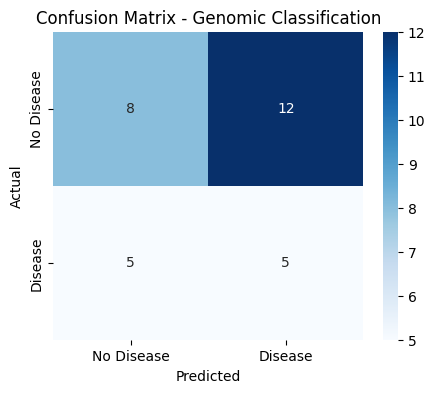

In [ ]:
# Confusion Matrix

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease", "Disease"], 
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - Genomic Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# t (8): Correctly predicted as No Disease → True Negatives (TN)

# Top-right (12): Actually No Disease but predicted Disease → False Positives (FP)

# Bottom-left (5): Actually Disease but predicted No Disease → False Negatives (FN)

# Bottom-right (5): Correctly predicted Disease → True Positives (TP)

In [ ]:

# Molecular Docking Part:

# Generates simulated docking scores for 20 ligands.

# Visualizes them.

# Selects the ligand with the strongest predicted binding.

# Genomic ML Part:

# Simulates binary gene expression data.

# Trains a Random Forest classifier.

# Evaluates predictions using accuracy and classification metrics.

# Essentially, this script combines virtual screening with genomics-based machine learning, giving you both a visual + data-driven approach to select ligands and evaluate models.